# Wind Turbine Scada Database *EDA*

**Context** 
 - Dans les éoliennes, les systèmes SCADA mesurent et enregistrent des données telles que la vitesse du vent, la direction du vent, la puissance générée, etc. par intervalles de 10 minutes. Ce fichier a été extrait du système SCADA d'une éolienne en fonctionnement et produisant de l'électricité en Turquie.
 - En outre, Une prévision éolienne efficace à court terme est essentielle pour assurer la stabilité adéquate du système électrique, la régulation et le contrôle des coûts. Il existe diverses sources d'énergie renouvelable importantes, notamment l'énergie éolienne, qui est l'une des sources d'énergie les plus favorables.

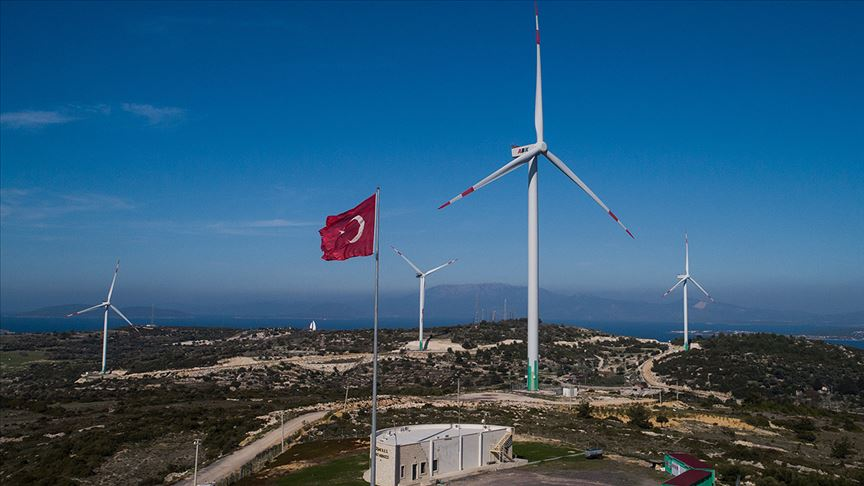

In [1]:
from IPython.display import Image
Image("/Users/User/Downloads/turkey.jpeg")


 
### Compréhension du problème :
Pour ce projet de prédiction de la production d'énergie éolienne, il est important de comprendre les enjeux et les défis du secteur de l'énergie éolienne, ainsi que les attentes des clients ou utilisateurs finaux. Il faut également s'informer sur les différentes sources de données disponibles et sur les méthodes actuellement utilisées pour prédire la production d'énergie éolienne.

### les objectifs métiers
Les objectifs de ce projet pourraient être de prédire la production d'énergie éolienne pour **améliorer l'efficacité énergétique et réduire les coûts de production**. Les questions métiers à répondre pourraient être : 
- Quels sont les facteurs qui influencent la production d'énergie éolienne ? 
- Comment pouvons-nous prédire la production d'énergie éolienne de manière fiable ?
### Indicateurs de performance :
Les indicateurs de performance pourraient être la précision de la prédiction, la réduction des coûts de production et l'augmentation de l'efficacité énergétique.

### Sources de données : 
Wind turbine's scada system that is working and generating power in Turkey
### Parties prenantes : 
les ingénieurs en énergie, les analystes de données, les fabricants de turbines éoliennes et les clients qui utilisent l'énergie éolienne.
    
### Description des variables d'étude:

- **Date/Time**  (par intervalles de 10 minutes)

- **LV ActivePower (kW):** La puissance générée par la turbine à ce moment-là
- **Wind Speed (m/s):** La vitesse du vent à la hauteur du moyeu de la turbine (la vitesse du vent que la turbine utilise pour produire de l'électricité)
- **Theoretical_Power_Curve (KWh):** Les valeurs de puissance théorique que la turbine génère avec cette vitesse du vent qui est donnée par le fabricant de la turbine
- **Wind Direction (°):** La direction du vent à la hauteur du moyeu de la turbine (les éoliennes se tournent automatiquement vers cette direction)

-----------------------------------------------------------------------------------------------------------------
Pour ce projet, nous avons choisi d'utiliser la méthodologie CRISP-DM en raison de sa pertinence et de sa popularité dans l'industrie des données. Cette méthodologie en six phases nous permettra de travailler de manière structurée et efficace, en nous assurant de répondre aux objectifs du projet tout en restant flexibles pour adapter notre approche en fonction des résultats intermédiaires obtenus.
**NB: pour ce premier livrable on se limitera aux étapes de l'EDA**

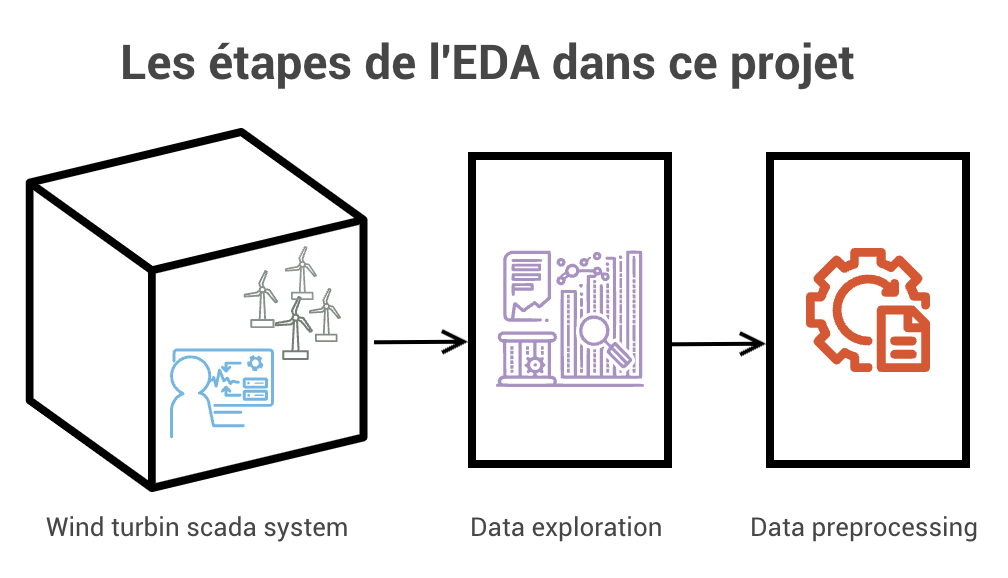

In [1]:
from IPython.display import Image
Image("plan_proj.png")

In [1]:
# Importation des bibliotèques qu'on va utiliser pour l'EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import time

In [2]:
# Importer la data
data= pd.read_csv("T1.csv")

## Data Exploration

In [6]:
# Overview 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


------
- Les quatre variables sont de type réels sauf la variable time qui est de type objet. la modification des types des variables semblerait pertinant. De plus toute les variables sont non nulles , par conséquent cet projet ne necessitera pas une étude des valeurs manquantes.

In [7]:
# Overview 
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


La description préliminaire du dataset releve des interprétations importantes et plusieurs ambiguités dont l'investigation est cruciale.
- Quelle est la signification d'une ou plusieurs observation négative pour la variable LV ActivePower **min = -2.47**?
- Interprétation de l'écart entre les valeurs estimées (theoretical_Power_curve ) et les valeurs enregistrées ( LV ActivePower)?
- Aggrégation de la variable wind speed ainsi que wind direction pour plus de compréhension et pertinence

In [8]:
# Etude des ActivePower Negative:
negative= data[data["LV ActivePower (kW)"]<0]
negative.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,57.000000,57.000000,57.000000,57.000000
mean,-0.325730,2.807465,12.856540,158.625817
std,0.401506,0.441974,36.387774,84.839975
min,-2.471405,1.973656,0.000000,7.084192
25%,-0.456533,2.574092,0.000000,92.270073
50%,-0.166333,2.733283,0.000000,137.306000
75%,-0.095733,3.047134,17.686014,238.410294
max,-0.000467,4.591375,241.595226,330.001099


In [9]:
#Etude des ActivePower Negative et de Theoretical_Power_Curve=0
negative[negative["Theoretical_Power_Curve (KWh)"]==0].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,40.000000,40.000000,40.0,40.000000
mean,-0.252743,2.602747,0.0,168.206104
std,0.236685,0.258029,0.0,79.786693
min,-1.077131,1.973656,0.0,21.895981
25%,-0.400384,2.523818,0.0,106.977051
50%,-0.165034,2.666868,0.0,161.224800
75%,-0.095883,2.751779,0.0,239.367119
max,-0.006533,2.949518,0.0,330.001099


In [10]:
#Pourcentage de ActivePower Negative
(len(negative)/len(data))*100

0.11280427468830397

## Feautures engineering

In [3]:
# Create a copy of data and starting feauture engineering
datac= data.copy()
# Changer les noms des colonnes pour facilité les tâches
datac.columns = ["Time", "ActivePower", "WindSpeed", "Theoretical_Power_Curve", "WindDirection"]
# Ajout d'une colonne Loss= Theoretical_Power_Curve-ActivePower & Loss%
datac["Loss"] = datac["Theoretical_Power_Curve"]- datac["ActivePower"]
datac.head()

,Time,ActivePower,WindSpeed,Theoretical_Power_Curve,WindDirection,Loss
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,36.281117
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,66.148316
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,84.523429
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,96.481664
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,111.052276


In [9]:
datac["Time"] = pd.to_datetime(datac["Time"], format = "%d %m %Y %H:%M", errors = "coerce")

In [4]:
# Ajout de colonne mois,jour, heure et minute
datac['month']=datac['Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[1])
datac['Day']=datac['Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[2])
datac['Hours']=datac['Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[3])
datac['Minutes']=datac['Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
datac.head(10)

,Time,ActivePower,WindSpeed,Theoretical_Power_Curve,WindDirection,Loss,month,Day,Hours,Minutes
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,36.281117,1,1,0,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,66.148316,1,1,0,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,84.523429,1,1,0,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,96.481664,1,1,0,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,111.052276,1,1,0,40
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,97.044387,1,1,0,50
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,109.766650,1,1,1,0
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,27.655991,1,1,1,10
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,30.026438,1,1,1,20
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,35.981075,1,1,1,30


In [5]:
#function for rewriting wind direction for 30 intervals. 
#For example: wind directions between 15 and 45 turns 30,wind speeds between 45 and 75 turns 60
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [7]:
#function for rewriting wind direction with letters. 
#For example: 0=N, 30=NNE 60=NEE etc.
def find_direction(x):
    if x==0:
        return "N"
    if x==30:
        return "NNE"
    if x==60:
        return "NEE" 
    if x==90:
        return "E" 
    if x==120:
        return "SEE" 
    if x==150:
        return "SSE" 
    if x==180:
        return "S" 
    if x==210:
        return "SSW" 
    if x==240:
        return "SWW" 
    if x==270:
        return "W"
    if x==300:
        return "NWW"
    if x==330:
        return "NNW"

In [10]:
# Ajout de 2 columns afin de classer catégoriellement "WindDirection"
datac["mean_Direction"]=datac["WindDirection"].apply(mean_direction)
datac["Direction"]=datac["mean_Direction"].apply(find_direction)
datac.head()

,Time,ActivePower,WindSpeed,Theoretical_Power_Curve,WindDirection,Loss,month,Day,Hours,Minutes,mean_Direction,Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117,1,1,0,0,270,W
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316,1,1,0,10,270,W
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429,1,1,0,20,270,W
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,96.481664,1,1,0,30,270,W
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,111.052276,1,1,0,40,270,W


In [11]:
# rendre la format plus lisible
datac=datac.round({'ActivePower': 2, 'WindSpeed': 2, 'Theoretical_Power_Curve': 2,
                                   'WindDirection': 2, 'Loss': 2, 'Loss(%)': 2})
datac.head()

,Time,ActivePower,WindSpeed,Theoretical_Power_Curve,WindDirection,Loss,month,Day,Hours,Minutes,mean_Direction,Direction
0,2018-01-01 00:00:00,380.05,5.31,416.33,259.99,36.28,1,1,0,0,270,W
1,2018-01-01 00:10:00,453.77,5.67,519.92,268.64,66.15,1,1,0,10,270,W
2,2018-01-01 00:20:00,306.38,5.22,390.90,272.56,84.52,1,1,0,20,270,W
3,2018-01-01 00:30:00,419.65,5.66,516.13,271.26,96.48,1,1,0,30,270,W
4,2018-01-01 00:40:00,380.65,5.58,491.70,265.67,111.05,1,1,0,40,270,W


## Data visualisation

On ce qui suit on cherche premièrement l'existence d'une différence entre les mois pour active power, wind speed, theoretical power curve et la variable loss.


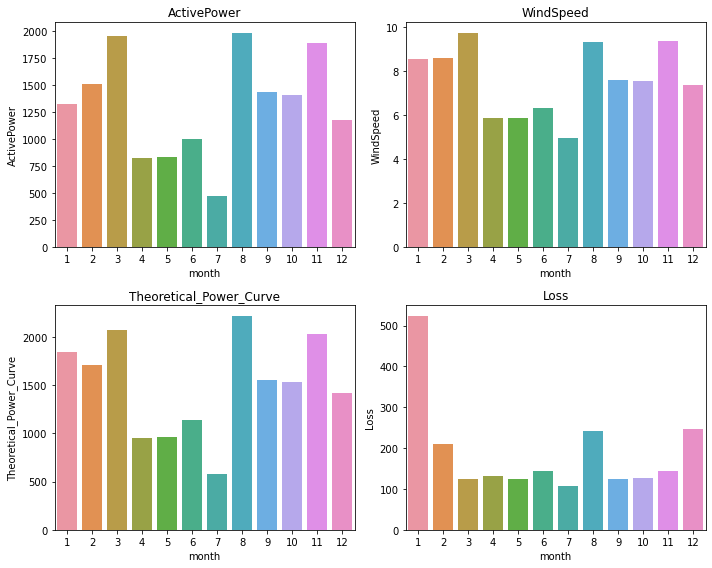

In [18]:
monthly=datac[["ActivePower","WindSpeed","Theoretical_Power_Curve","Loss","month"]].groupby('month',axis=0, as_index=False).mean()
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='month', y=monthly.columns[i+1], data=monthly)
    plt.title(monthly.columns[i+1])
plt.tight_layout()
plt.show()

Il semblerait que la production de l'energie atteint son maximum en mars, auout et novembre cette constation et conforme aux valeurs estimés et aux vitesse de vents élévées (prévu vue la corrélation) cependant pour le mois de janvier qui enregistre le loss le plus important la vitesse de vent est relativement importante qu'est ce quii peut expliquer **cette contradiction**? 

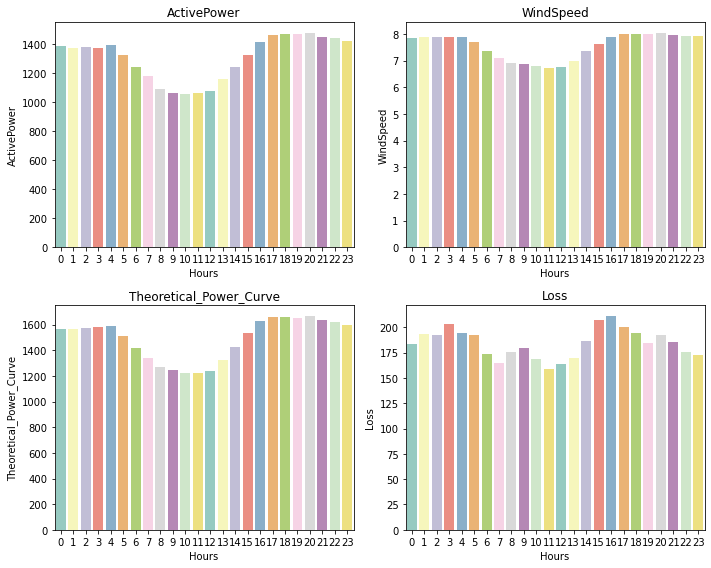

In [19]:
hourly=datac[["ActivePower","WindSpeed","Theoretical_Power_Curve","Loss","Hours"]].groupby('Hours',axis=0, as_index=False).mean()
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Hours', y=hourly.columns[i+1], data=hourly, palette="Set3")
    plt.title(hourly.columns[i+1])
plt.tight_layout()
plt.show()

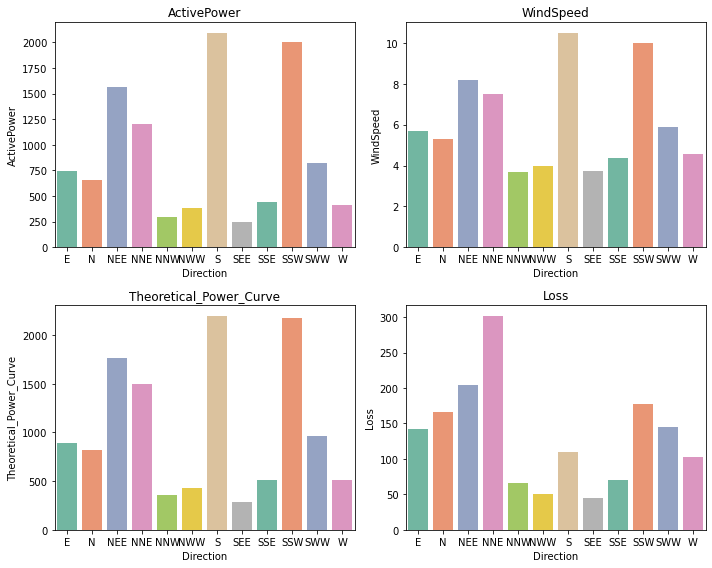

In [20]:
direction=datac[["ActivePower","WindSpeed","Theoretical_Power_Curve","Loss","Direction"]].groupby('Direction',axis=0, as_index=False).mean()
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Direction', y=hourly.columns[i+1], data=direction, palette='Set2')
    plt.title(direction.columns[i+1])
plt.tight_layout()
plt.show()

## En résumé:

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


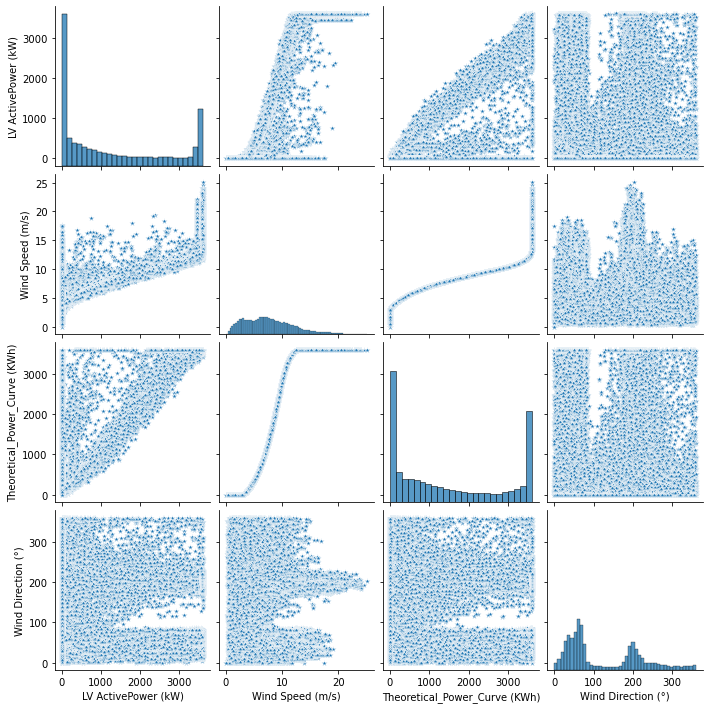

In [27]:
display(data[['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']].corr())
sns.pairplot(data[['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']], markers='*',);

<AxesSubplot:>

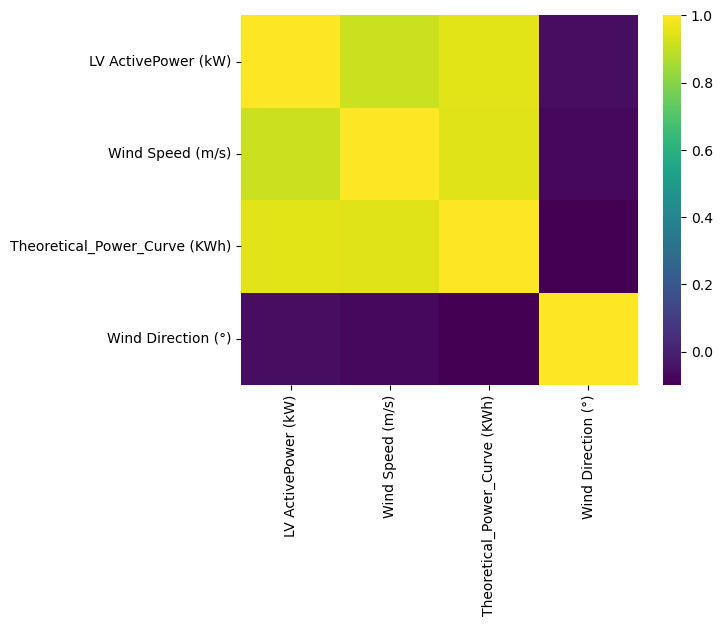

In [14]:
sns.heatmap(data.corr(), cmap='viridis')

----
La vitesse du vent et la production d'énergie sont fortement corrélées, comme on pourrait s'y attendre. Cela implique qu'à mesure que la vitesse du vent augmente, la production d'énergie a également tendance à augmenter. Cependant, on peut observer une production d'énergie réduite pour certaines directions du vent.

### Etude des Séries Chronologiques

 Dans cette partie on va s'intéresser à l'étude de notre base de donnée comme étant une série chronologique multivariée

In [44]:
# Creant une autre copy de data
datas= data.copy()
# Changer les noms des colonnes pour facilité les tâches
datas.columns = ["Time", "ActivePower", "WindSpeed", "Theoretical_Power_Curve", "WindDirection"]
# Ajout d'une colonne Loss= Theoretical_Power_Curve-ActivePower & Loss%
datas["Loss"] = datas["Theoretical_Power_Curve"]- datas["ActivePower"]
#datas["Loss(%)"]= datas["Loss"]/datas["Theoretical_Power_Curve"]*100
# Convertire la colonne Time en type Date
datas["Time"] = pd.to_datetime(datac["Time"], format = "%d %m %Y %H:%M", errors = "coerce")
# rendre la format plus lisible
datac=datac.round({'ActivePower': 2, 'WindSpeed': 2, 'Theoretical_Power_Curve': 2,
                                   'WindDirection': 2, 'Loss': 2, 'Loss(%)': 2})
datas.head()

,Time,ActivePower,WindSpeed,Theoretical_Power_Curve,WindDirection,Loss
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,96.481664
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,111.052276


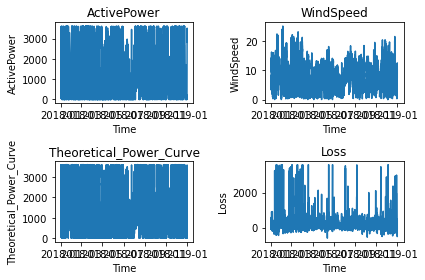

In [45]:
# Visualization

plot=datas[["Time","ActivePower","WindSpeed","Theoretical_Power_Curve","Loss"]]
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.lineplot(x='Time', y=plot.columns[i+1], data=plot)
    plt.title(plot.columns[i+1])
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Time', ylabel='ActivePower'>

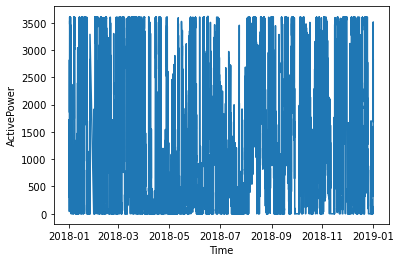

In [46]:
sns.lineplot(x='Time', y=datas.columns[1], data=datas)

In [47]:
# Faire le test de stationnarity pour ActivePower
from statsmodels.tsa.stattools import adfuller
X = datas["ActivePower"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


ADF Statistic: -14.008555
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [48]:
# Faire le test de stationnarity pour ActivePower
from statsmodels.tsa.stattools import adfuller
X = datas["Theoretical_Power_Curve"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.764615
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


 In this case, the ADF statistic is much more negative than all the critical values at 1%, 5%, and 10% levels of significance. This suggests that we can reject the null hypothesis and conclude that the data is stationary with a high level of confidence. In other words, there is strong evidence that the time series data does not have a unit root and is stationary.

In [49]:
# Faire le test de stationnarity pour ActivePower
from statsmodels.tsa.stattools import adfuller
X = datas["Loss"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.787113
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [50]:
# Faire le test de stationnarity pour ActivePower
from statsmodels.tsa.stattools import adfuller
X = datas["WindSpeed"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.932536
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


**---------------On peut conclure que tous les variables sont stationnaires----------------------------------------------------**

In [51]:
# Test de La causalité de Granger
from statsmodels.tsa.stattools import grangercausalitytests
maxlag = 12
test   = 'ssr_chi2test'
#
grangercausalitytests(datas[["ActivePower","WindSpeed"]], maxlag=[12])


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=17.2453 , p=0.0000  , df_denom=50493, df_num=12
ssr based chi2 test:   chi2=207.0463, p=0.0000  , df=12
likelihood ratio test: chi2=206.6231, p=0.0000  , df=12
parameter F test:         F=17.2453 , p=0.0000  , df_denom=50493, df_num=12


{12: ({'ssr_ftest': (17.24531807801193, 1.4526290737686607e-37, 50493.0, 12),
   'ssr_chi2test': (207.0462785728731, 1.1422415150189773e-37, 12),
   'lrtest': (206.62314829055686, 1.39714488714122e-37, 12),
   'params_ftest': (17.245318078021242,
    1.4526290736947997e-37,
    50493.0,
    12.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          

**Par suite "*WindSpeed*" cause belle et bien "*ActivePower*" dans notre modèle**

In [52]:
grangercausalitytests(datas[["ActivePower","Theoretical_Power_Curve"]], maxlag=[12])


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=15.8060 , p=0.0000  , df_denom=50493, df_num=12
ssr based chi2 test:   chi2=189.7660, p=0.0000  , df=12
likelihood ratio test: chi2=189.4105, p=0.0000  , df=12
parameter F test:         F=15.8060 , p=0.0000  , df_denom=50493, df_num=12


{12: ({'ssr_ftest': (15.8060105965007, 5.145724018537639e-34, 50493.0, 12),
   'ssr_chi2test': (189.7660372679038, 4.196024695813961e-34, 12),
   'lrtest': (189.41050834185444, 4.96606484248396e-34, 12),
   'params_ftest': (15.806010596509546,
    5.1457240182907685e-34,
    50493.0,
    12.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0.

**Par suite "*Theorical_Power_Curve*" cause belle et bien "*ActivePower*" dans notre modèle**